# **Project Name**    -  Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

This project analyzes a hotel booking dataset to uncover factors influencing booking decisions and guest behavior. The data includes information from a city and resort hotel, encompassing booking times, guest details, room types, and special requests.

Dataset Exploration:

The dataset comprises over 119,390 entries with 32 columns containing details like booking dates, guest counts, room types, and cancellation statuses.
Initial analysis revealed a seasonal trend, with both hotels experiencing the most bookings in August and the least in January. City hotels consistently received more bookings compared to resorts.

Key Insights:

Seasonality:
August emerged as the peak season for both hotels, with the highest number of bookings, weeknight stays, weekend stays, and car parking space requirements.
Guest Preferences: Weeknight stays were generally preferred over weekend stays. Breakfast-only (BB) was the most popular meal plan across both hotels. City hotels saw a higher demand for car parking compared to resorts.

Booking Behavior:
Lead time (time between booking and arrival) increased from February, peaked in July, and showed fluctuations throughout the year. Cancellations and check-outs were most frequent in August and least frequent in January. Transient guests (one-time bookers) had the highest cancellation rates, while group bookings had the lowest.

Guest Characteristics:
Repeated guests (returning customers) were less likely to cancel bookings and had a higher number of previous non-canceled bookings compared to new guests. Bookings with children were more likely to include babies.

Correlations:
The analysis identified some interesting correlations. Bookings with longer lead times had a slightly higher probability of cancellation. Interestingly, a higher number of special requests were associated with fewer cancellations. Guests requiring car parking were also more likely to have special requests.

Project Significance:

Understanding guest behavior and booking patterns is crucial for hotels to optimize their operations and marketing strategies. This project's insights can be valuable for:

Revenue Management:
By identifying peak seasons and preferred room types, hotels can adjust pricing strategies to maximize revenue during high-demand periods.

Targeted Marketing:
Analyzing guest preferences (e.g., meal plans, car parking needs) allows for targeted marketing campaigns to attract specific guest segments.

Improved Guest Experience:
Understanding cancellation trends and guest behavior can help hotels develop strategies to reduce cancellations and enhance guest satisfaction.

# **GitHub Link -**

https://github.com/sumedh333/Hotel-Booking-Analysis

# **Problem Statement**


This project aims to explore a hotel booking dataset containing information from both a city hotel and a resort hotel. The dataset includes details such as booking dates, length of stay, number of guests (adults, children, babies), available parking spaces, and more. By conducting exploratory data analysis, the goal is to uncover key factors influencing hotel bookings and identify patterns that can inform strategic decisions for maximizing occupancy and guest satisfaction

#### **Define Your Business Objective?**

"Optimize hotel occupancy and guest satisfaction by analyzing booking patterns and identifying key factors influencing booking decisions using a comprehensive hotel booking dataset."

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
hotel_booking_data=pd.read_csv('Hotel Bookings.csv')

### Dataset First View

In [3]:
# Dataset First Look
hotel_booking_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
hotel_booking_data.shape

(119390, 32)

### Dataset Information

In [5]:
# Dataset Info
hotel_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
hotel_booking_data.duplicated().sum()

np.int64(31994)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
hotel_booking_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64

<Axes: >

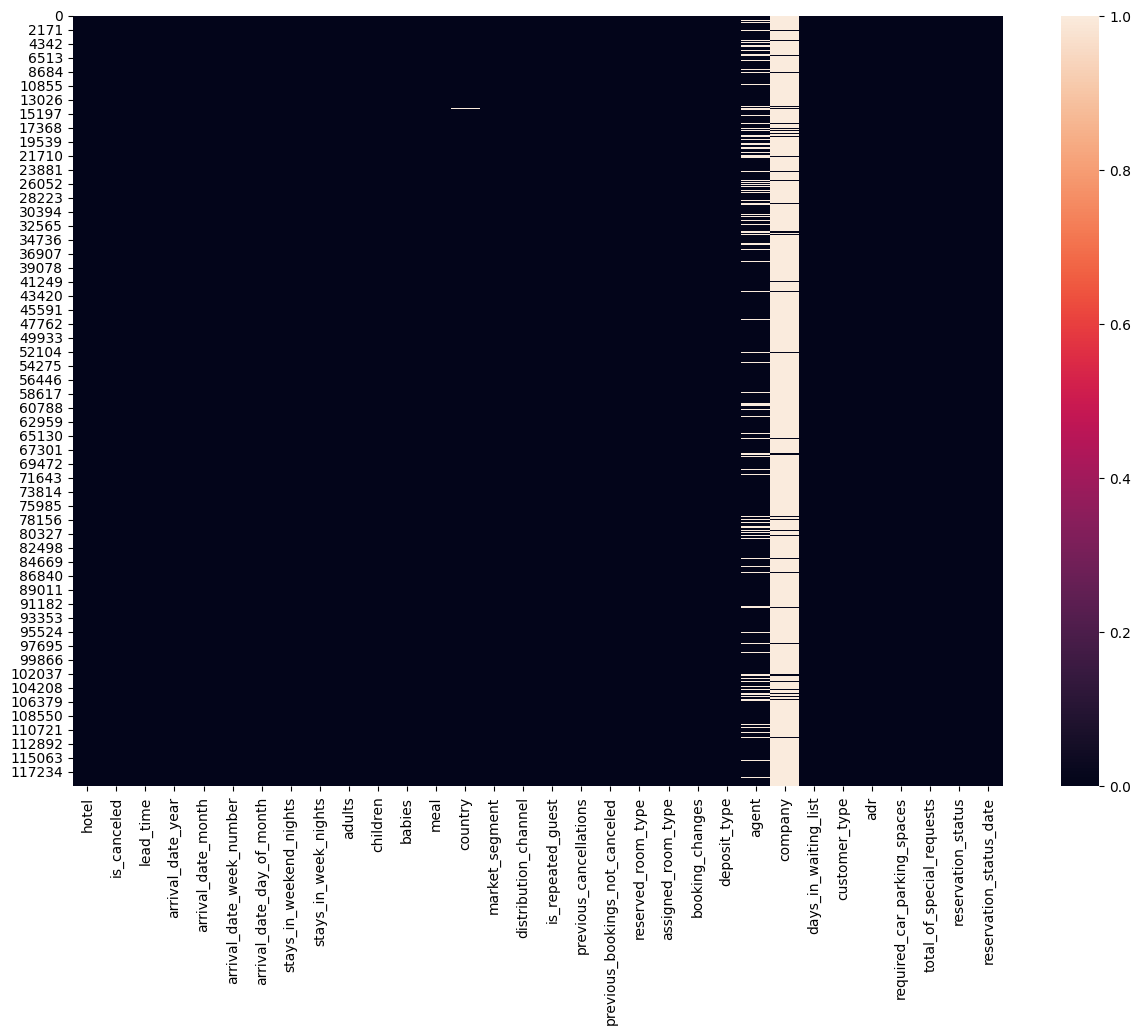

In [8]:
# Visualizing the missing values
plt.figure(figsize=(15,10))
sns.heatmap(hotel_booking_data.isnull())

### What did you know about your dataset?


we have hotel booking dataset in this dataset we have 119390 rows and 32 columns each column have different data types like integer,float and string.This dataset has 31994 duplicate values and some columns have null values columns like company have 112593 null values and agent column has 16340 null values

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
hotel_booking_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# Dataset Describe
hotel_booking_data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

### Variables Description



hotel:
Data Type: Categorical
Description: Type of hotel (e.g., Resort Hotel or City Hotel).
Possible Values: "Resort Hotel", "City Hotel"

is_canceled:
Data Type: Integer
Description: Indicates if the booking was canceled (1) or not (0).
Possible Values: 1 (canceled), 0 (not canceled)

lead_time:
Data Type: Integer
Description: Number of days between the booking date and the arrival date.
Possible Values: 0 to 737 (or more, depending on the data)

arrival_date_year:
Data Type: Integer
Description: Year of arrival date.
Possible Values: e.g., 2015, 2016, 2017

arrival_date_month:
Data Type: Categorical
Description: Month of arrival date.
Possible Values: e.g., "January", "February", ..., "December"

arrival_date_week_number:
Data Type: Integer
Description: Week number of the year for the arrival date.
Possible Values: 1 to 53

arrival_date_day_of_month:
Data Type: Integer
Description: Day of the month for the arrival date.
Possible Values: 1 to 31

stays_in_weekend_nights:
Data Type: Integer
Description: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
Possible Values: 0 or more

stays_in_week_nights:
Data Type: Integer
Description: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
Possible Values: 0 or more

adults:
Data Type: Integer
Description: Number of adults.
Possible Values: 1 or more

children:
Data Type: Integer
Description: Number of children.
Possible Values: 0 or more

babies:
Data Type: Integer
Description: Number of babies.
Possible Values: 0 or more

meal:
Data Type:Categorical
Description:Type of meal
Possible Values:BB,FB,HB

country:
Data Type: Categorical
Description: Country of origin.
Possible Values: Country codes (e.g., "PRT", "GBR", "USA")

market_segment:
Data Type: Categorical
Description: Market segment designation.
Possible Values: "Direct", "Corporate"

distribution_channel:
Data Type: Categorical
Description: Booking distribution channel.
Possible Values: "Direct","TA/TO"

is_repeated_guest:
Data Type: Integer
Description: Indicates if the booking is from a repeated guest (1) or not (0).
Possible Values: 1 (repeated guest), 0 (new guest)

previous_cancellations:
Data Type: Integer
Description: Number of previous bookings that were canceled by the customer prior to the current booking.
Possible Values: 0 to n

previous_bookings_not_canceled:
Data Type: Integer
Description: Number of previous bookings not canceled by the customer prior to the current booking.
Possible Values: 0 to n

reserved_room_type:
Data Type: Categorical
Description: Code of room type reserved.
Possible Values: A,C,D

assigned_room_type:
Data Type: Categorical
Description: Code for the room type assigned to the booking.
Possible Values: C,A,D,E

booking_changes:
Data Type: Integer
Description: Number of changes made to the booking from the moment the booking was entered until the moment of check-in or cancellation.
Possible Values: 0 to n

deposit_type:
Data Type: Categorical
Description: Type of deposit made for the booking.
Possible Values: No Deposit,Non refund

agent:
Data Type: Integer
Description: ID of the travel agency that made the booking.
Possible Values: Unique ID numbers

company:
Data Type: Integer
Description: ID of the company or organization that made the booking.
Possible Values: Unique ID numbers

days_in_waiting_list:
Data Type: Integer
Description: Number of days the booking was in the waiting list before it was confirmed to the customer.
Possible Values: 0 to n

customer_type:
Data Type: Categorical
Description: Type of customer.
Possible Values: "Transient", "Transient-Party", "Contract", "Group"

adr:
Data Type: Float
Description: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
Possible Values: Any positive float value

required_car_parking_spaces:
Data Type: Integer
Description: Number of car parking spaces required by the customer.
Possible Values: 0 to n


total_of_special_requests:
Data Type: Integer
Description: Number of special requests made by the customer
Possible Values: 0 to n

reservation_status:
Data Type: Categorical
Description: Reservation last status.
Possible Values: "Canceled", "Check-Out"

reservation_status_date:
Data Type: Date
Description: Date at which the last status was set.
Possible Values: Date values









### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in hotel_booking_data.columns:
  print(i,hotel_booking_data[i].unique())

hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
lead_time [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:

# Handling missing values
replace_values = ['?', 'NA', 'na', 'NaN', '-', 'Undefined', 'undefined']
hotel_booking_data.replace(replace_values, np.nan, inplace=True)


In [13]:
#checking data types of columns
hotel_booking_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                 object
reservation_status_date            object
dtype: object

In [14]:
# Converting 'reservation_status_date' to datetime format
hotel_booking_data['reservation_status_date'] = pd.to_datetime(hotel_booking_data['reservation_status_date'])


In [15]:
hotel_booking_data.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type                        object
booking_changes                            int64
deposit_type                              object
agent                                    float64
company                                  float64
days_in_waiting_list                       int64
customer_type                             object
adr                                      float64
required_car_parking_spaces                int64
total_of_special_requests                  int64
reservation_status                        object
reservation_status_date           datetime64[ns]
dtype: object

### What all manipulations have you done and insights you found?


In the database there were lot of missing values so in the first step I have replaced probable '?','-',' ',NA etc with nan.
then I changed reservation_status_date column data type to datetime

### Export cleaned dataset

In [16]:
hotel_booking_data.to_csv("hotel_booking_data_cleaned.csv", index=False)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-517308724.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = hotel_booking_data.groupby(['arrival_date_month', 'hotel']).size().unstack()


<Figure size 1200x600 with 0 Axes>

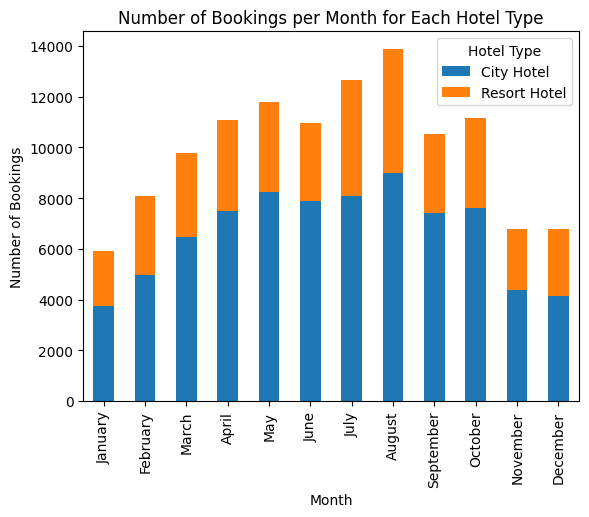

In [17]:
# Chart - 1 visualization code
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'arrival_date_month' column to a categorical type with an ordered sequence of months
hotel_booking_data['arrival_date_month'] = pd.Categorical(
    hotel_booking_data['arrival_date_month'],
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered=True
)

# Count the number of bookings per month for each hotel type
monthly_counts = hotel_booking_data.groupby(['arrival_date_month', 'hotel']).size().unstack()

# Plot the data
plt.figure(figsize=(12, 6))  # Set the figure size
monthly_counts.plot(kind='bar', stacked=True)  # Create a stacked bar plot
plt.title('Number of Bookings per Month for Each Hotel Type')  # Set the title of the plot
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Number of Bookings')  # Set the y-axis label
plt.legend(title='Hotel Type')  # Set the legend title
plt.show()  # Display the plot



##### 1. Why did you pick the specific chart?

Answer Here.

for understanding relationship between arrival month and hotel column I used barchart to find number of bookings per month for each category of hotel resort hotel and city hotel

##### 2. What is/are the insight(s) found from the chart?

Answer Here

after ploting bar chart i found that city hotel has more customers every month compared to resort hotel.highest number of customers come to hotel in the month of august and least number of customers come in the month of january

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


resort hotel needs to find out why they have less customers compared to city hotel also hotels need to increase customers in january,november and december months

#### Chart - 2

<Figure size 1000x600 with 0 Axes>

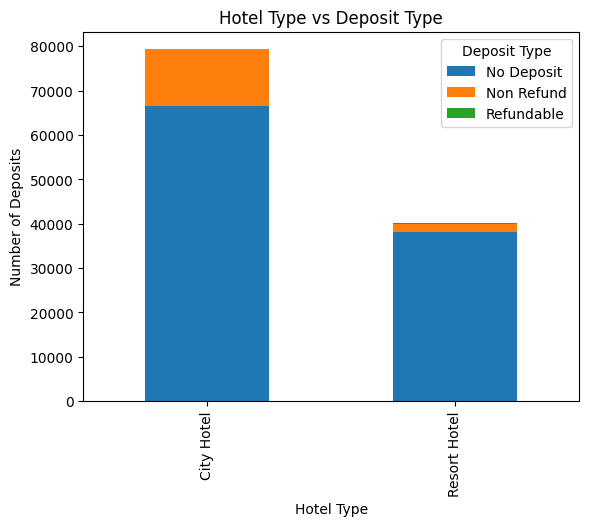

In [18]:
# Chart - 2 visualization code
# Plotting the relationship between hotel and deposit_type
plt.figure(figsize=(10, 6))
deposit_counts = hotel_booking_data.groupby(['hotel', 'deposit_type']).size().unstack()
deposit_counts.plot(kind='bar', stacked=True)

plt.title('Hotel Type vs Deposit Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Deposits')
plt.legend(title='Deposit Type')
# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

I picked bar graph to find relation between hotel and deposit type in the chart resort hotel and city hotel are represented by their deposit types

##### 2. What is/are the insight(s) found from the chart?

as we already know city hotel has more customers than resort hotel so city hotel has more deposits compared to resort hotels No deposit is maximum in both city hotel and resort hotel non refund deposit category comes second hand refundable comes at third

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

there is no negative impact but hotels try to increase refundable deposit beacuse more customers prefer refundable deposits

#### Chart - 3

/tmp/ipython-input-1740500716.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_data = hotel_booking_data.groupby('arrival_date_month')[['stays_in_week_nights', 'stays_in_weekend_nights']].sum().reset_index()


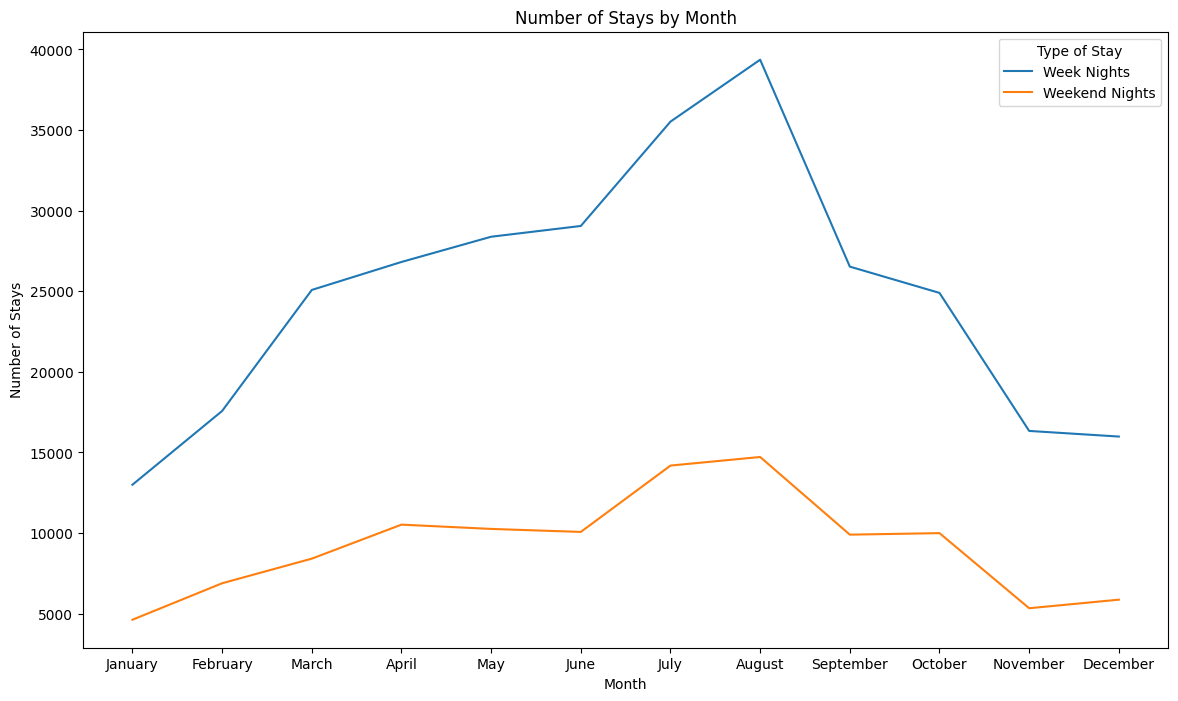

In [19]:
# Chart - 3 visualization code
import seaborn as sns

# Setting the size of the plot
plt.figure(figsize=(14, 8))

# Aggregating data to get the sum of stays per month
month_data = hotel_booking_data.groupby('arrival_date_month')[['stays_in_week_nights', 'stays_in_weekend_nights']].sum().reset_index()

# Sorting months in chronological order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_data['arrival_date_month'] = pd.Categorical(month_data['arrival_date_month'], categories=months_order, ordered=True)

# Plotting the data
sns.lineplot(data=month_data, x='arrival_date_month', y='stays_in_week_nights',label='Week Nights')
sns.lineplot(data=month_data, x='arrival_date_month', y='stays_in_weekend_nights', label='Weekend Nights')

plt.title('Number of Stays by Month')
plt.xlabel('Month')
plt.ylabel('Number of Stays')
plt.legend(title='Type of Stay')
# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

I picked linechart to show the trend of type of stay month wise beacuse line chart is used to show the trend over period of time

##### 2. What is/are the insight(s) found from the chart?

After plotting linechart I observed that customers prefer week night stays over weekend stays with august month has highest number of both weeknight and weekend stays.customer stay in both weeknight stays and weekend night stays increases from january month peak in august month and then gradualy declines

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the chart I observed that after august month customer stay declines hotels need to find way to increase customer stay





#### Chart - 4

/tmp/ipython-input-388940213.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parking_data = hotel_booking_data.groupby(['arrival_date_month', 'hotel'])['required_car_parking_spaces'].sum().reset_index()


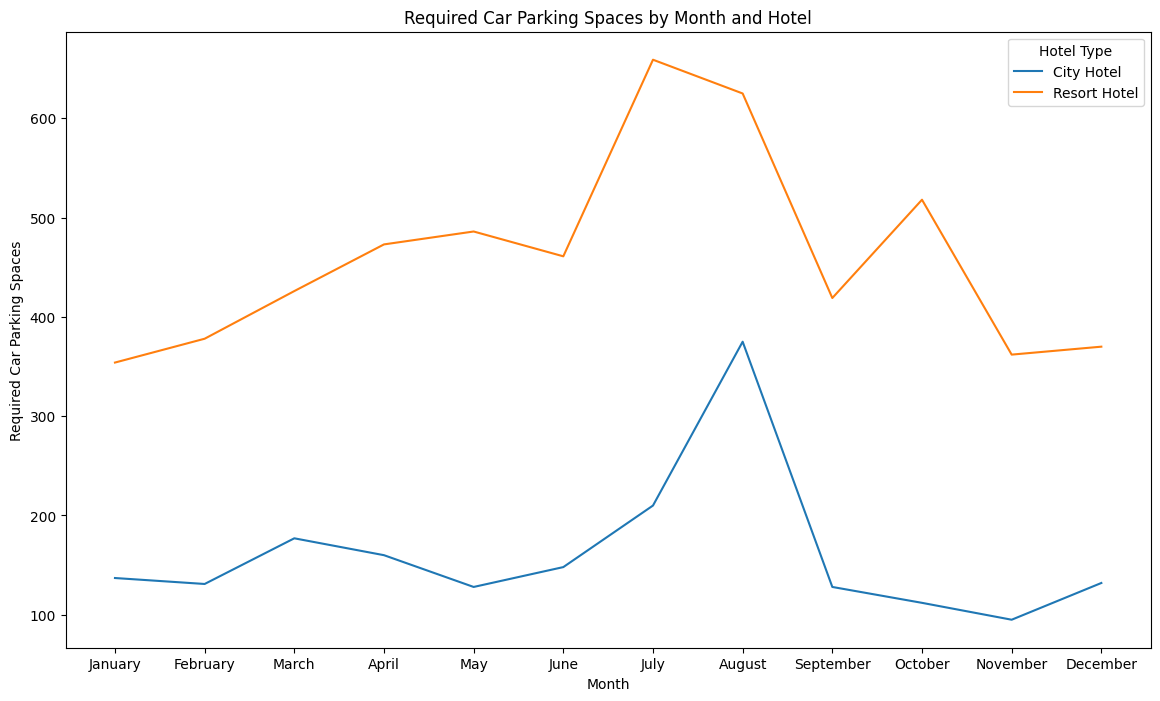

In [20]:
# Chart - 4 visualization code
# Setting the size of the plot
plt.figure(figsize=(14, 8))

# Aggregating data to get the sum of required car parking spaces per month for each hotel
parking_data = hotel_booking_data.groupby(['arrival_date_month', 'hotel'])['required_car_parking_spaces'].sum().reset_index()

# Sorting months in chronological order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
parking_data['arrival_date_month'] = pd.Categorical(parking_data['arrival_date_month'], categories=months_order, ordered=True)
parking_data = parking_data.sort_values('arrival_date_month')

# Plotting the data
sns.lineplot(data=parking_data, x='arrival_date_month', y='required_car_parking_spaces', hue='hotel')

plt.title('Required Car Parking Spaces by Month and Hotel')
plt.xlabel('Month')
plt.ylabel('Required Car Parking Spaces')
plt.legend(title='Hotel Type')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I picked line chart to show the trend of required car parking spaces by months and type of hotel

##### 2. What is/are the insight(s) found from the chart?

after ploting line chart resort hotel require more car parking space than city hotel also demand for resort hotel peaks in july and decline afterwards and for city hotel demand for car parking space peak in august and then decline afterwards

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

customers who have cars prefer resort hotel over city hotel city hotels should focus on increasing parking space

#### Chart - 5

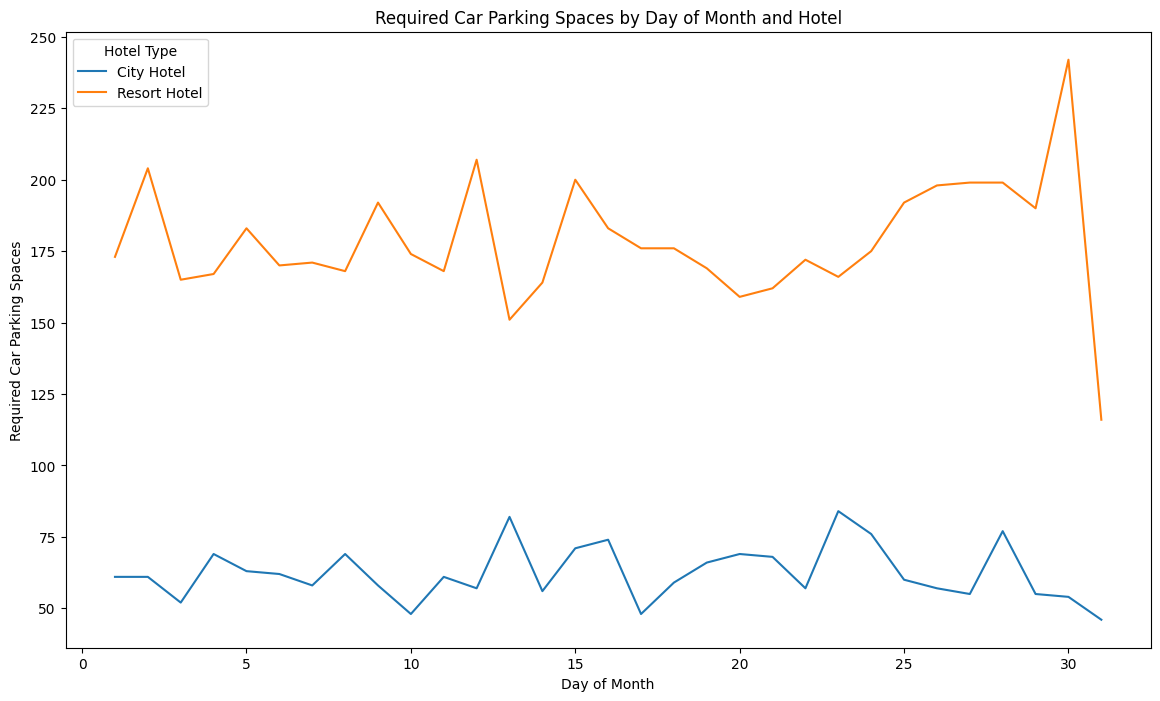

In [21]:
# Chart - 5 visualization code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the size of the plot
plt.figure(figsize=(14, 8))

# Aggregating data to get the sum of required car parking spaces per day for each hotel
parking_data = hotel_booking_data.groupby(['arrival_date_day_of_month', 'hotel'])['required_car_parking_spaces'].sum().reset_index()

# Plotting the data
sns.lineplot(data=parking_data, x='arrival_date_day_of_month', y='required_car_parking_spaces', hue='hotel')

plt.title('Required Car Parking Spaces by Day of Month and Hotel')
plt.xlabel('Day of Month')
plt.ylabel('Required Car Parking Spaces')
plt.legend(title='Hotel Type')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I picked line chart beacuse it shows trend over period of time this line chart shows trend of required car parking spaces by day of month by city hotel and resort hotel

##### 2. What is/are the insight(s) found from the chart?

After ploting line chart I found that there are some days where requirement for car parking space is more than other days of month like for resort hotels 1,12,15 and 30 date of month require more car parking space
for city hotel 13,23,28 date of month require more car parking space

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

there is no negative impact on growth

#### Chart - 6

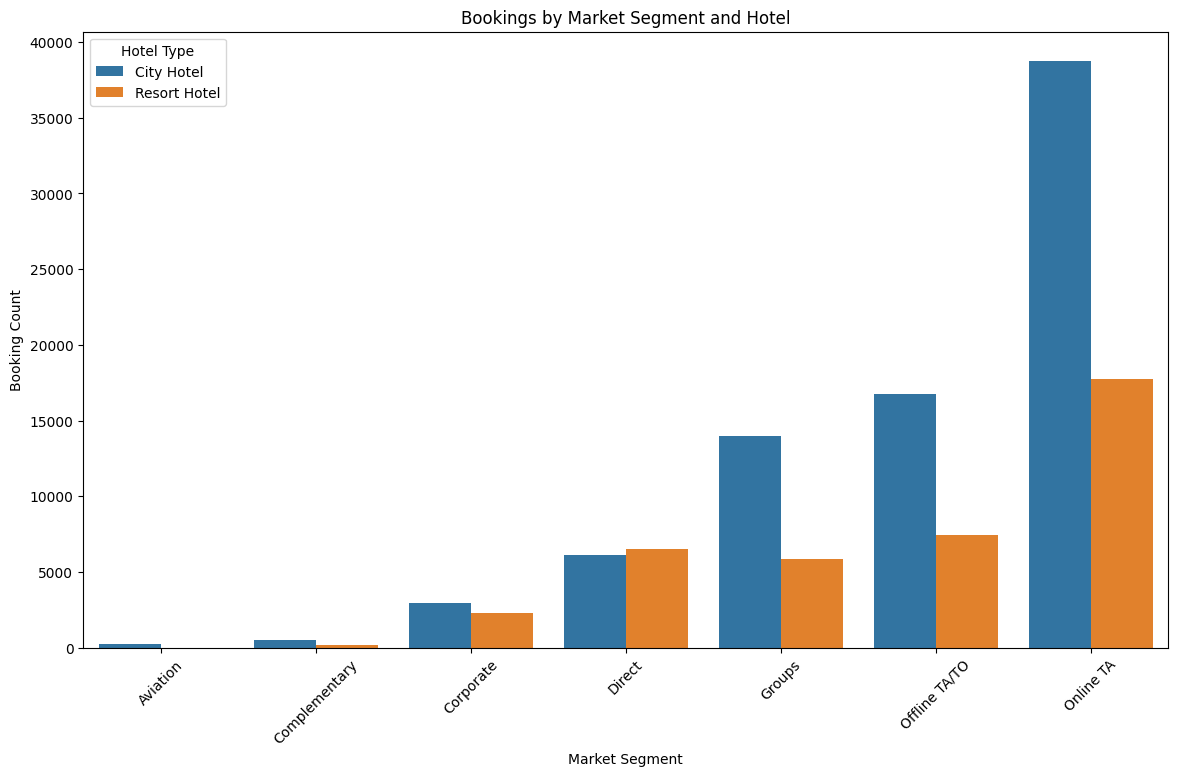

In [22]:
# Chart - 6 visualization code
# Setting the size of the plot
plt.figure(figsize=(14, 8))

# Aggregating data to get the count of bookings per market segment for each hotel
market_segment_data = hotel_booking_data.groupby(['market_segment', 'hotel']).size().reset_index(name='booking_count')

# Plotting the data
sns.barplot(data=market_segment_data, x='market_segment', y='booking_count', hue='hotel')

plt.title('Bookings by Market Segment and Hotel')
plt.xlabel('Market Segment')
plt.ylabel('Booking Count')
plt.legend(title='Hotel Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I used bar chart because here we are comparing categorical data with it's values.we are comparing different market segments and their booking count

##### 2. What is/are the insight(s) found from the chart?

after ploting bar chart I found that city hotel has higher bookings compared to resort hotel and if we look market segment wise then online TA has highest number of bookings and aviation has least number of bookings

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

hotels need to focus on aviation and complementary market segment beacuse these have least number of bookings

#### Chart - 7

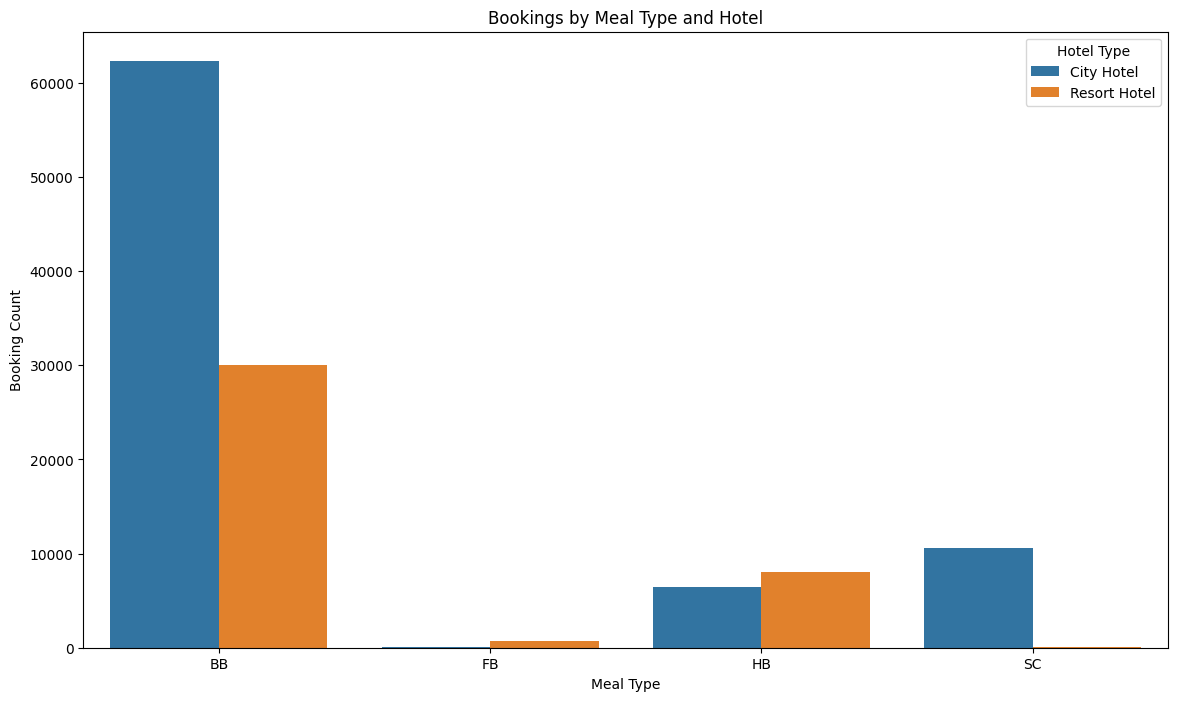

In [23]:
# Chart - 7 visualization code
# Setting the size of the plot
plt.figure(figsize=(14, 8))

# Aggregating data to get the count of bookings per meal type for each hotel
meal_data = hotel_booking_data.groupby(['meal', 'hotel']).size().reset_index(name='booking_count')

# Plotting the data
sns.barplot(data=meal_data, x='meal', y='booking_count', hue='hotel')

plt.title('Bookings by Meal Type and Hotel')
plt.xlabel('Meal Type')
plt.ylabel('Booking Count')
plt.legend(title='Hotel Type')

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

I picked bar chart because it is used for categorical data when it needs to compare by it's values

##### 2. What is/are the insight(s) found from the chart?

most prefered meal type in both city and resort hotel is BB and least prefered meal in city hotel is FB and in resort hotel is SC

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

FB meal type is lesst prefered among both hotels hotels need to find out reason behind this and update menu

#### Chart - 8

/tmp/ipython-input-3168048569.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meal_data = hotel_booking_data.groupby(['arrival_date_month', 'meal']).size().reset_index(name='booking_count')


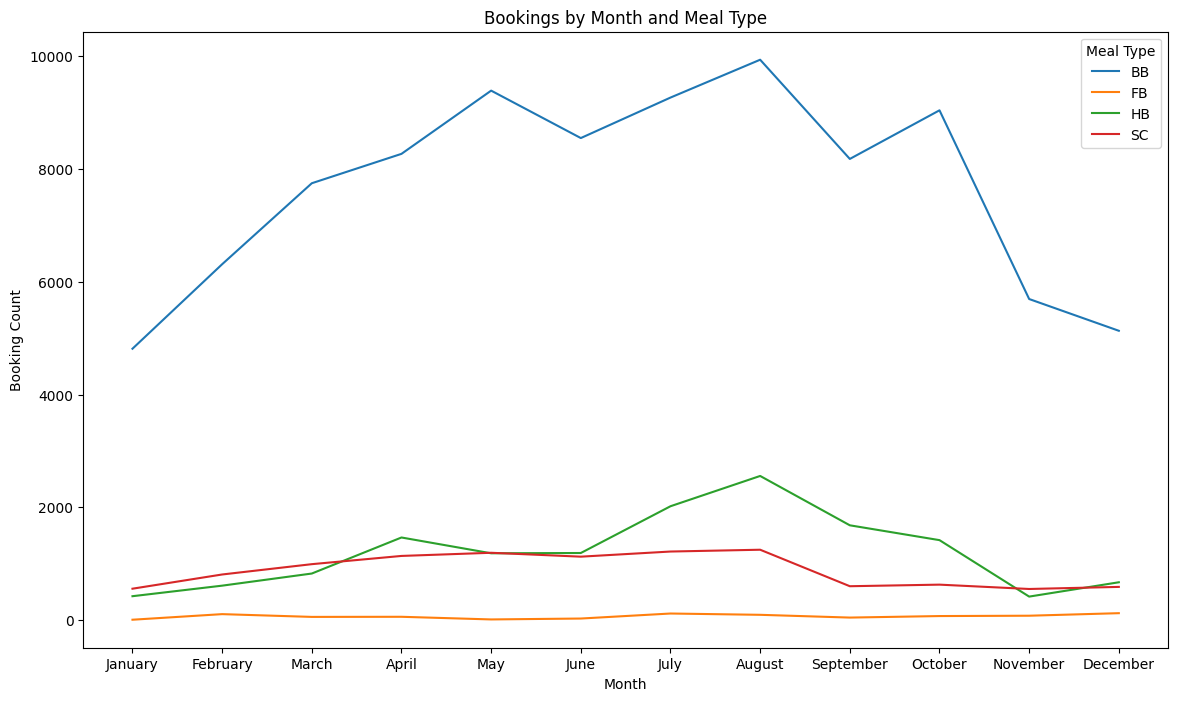

In [24]:
# Chart - 8 visualization code
# Setting the size of the plot
plt.figure(figsize=(14, 8))

# Aggregating data to get the count of bookings per month for each meal type
meal_data = hotel_booking_data.groupby(['arrival_date_month', 'meal']).size().reset_index(name='booking_count')

# Sorting months in chronological order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
meal_data['arrival_date_month'] = pd.Categorical(meal_data['arrival_date_month'], categories=months_order, ordered=True)
meal_data = meal_data.sort_values('arrival_date_month')

# Plotting the data
sns.lineplot(data=meal_data, x='arrival_date_month', y='booking_count', hue='meal')

plt.title('Bookings by Month and Meal Type')
plt.xlabel('Month')
plt.ylabel('Booking Count')
plt.legend(title='Meal Type')

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

I picked line chart because it shows trends of meal preferance over months

##### 2. What is/are the insight(s) found from the chart?

after ploting line chart I found that BB is most prefered meal all months and FB is lesst favoured meal in the month of august meal consumption is highest BB comes first HB comes second and SC comes third

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

FB and SC are less favoured meals hotels need to focus on these meals and try to find out reason and improve them

#### Chart - 9

/tmp/ipython-input-1095577266.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_data = hotel_booking_data.groupby('arrival_date_month')['lead_time'].mean().reset_index()


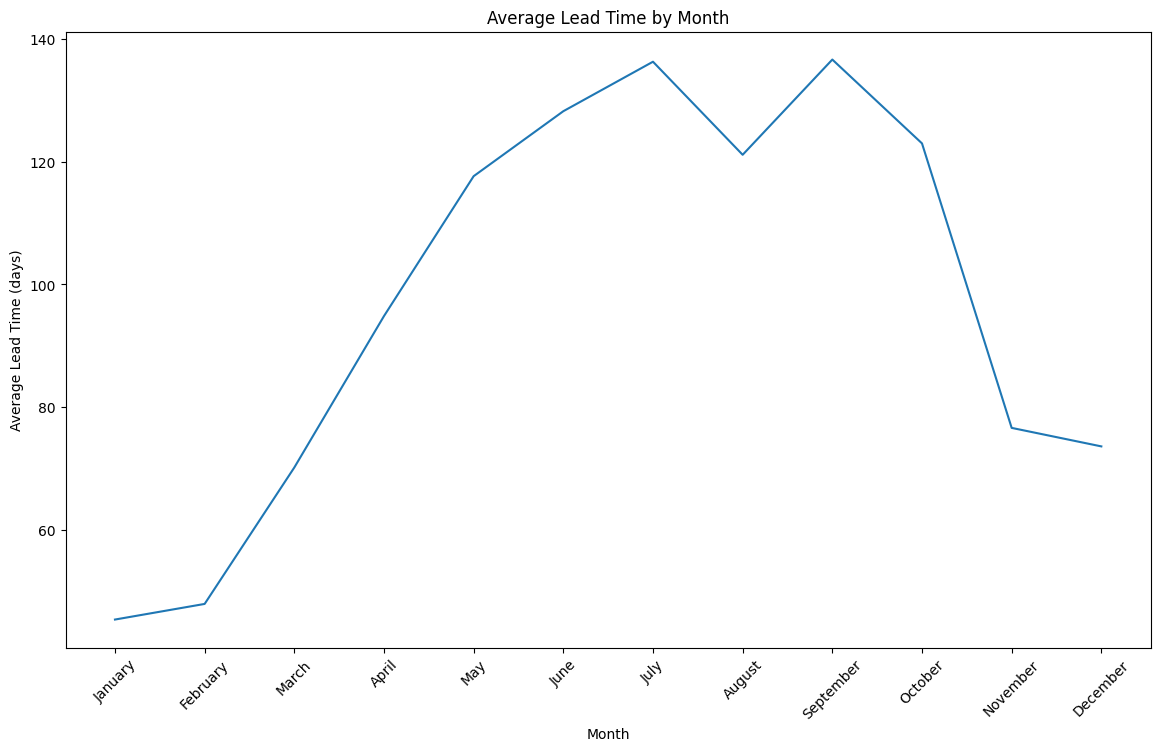

In [25]:
# Chart - 9 visualization code
# Setting the size of the plot
plt.figure(figsize=(14, 8))

# Aggregating data to get the average lead time per month
lead_time_data = hotel_booking_data.groupby('arrival_date_month')['lead_time'].mean().reset_index()

# Sorting months in chronological order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
lead_time_data['arrival_date_month'] = pd.Categorical(lead_time_data['arrival_date_month'], categories=months_order, ordered=True)
lead_time_data = lead_time_data.sort_values('arrival_date_month')

# Plotting the data
sns.lineplot(data=lead_time_data, x='arrival_date_month', y='lead_time')

plt.title('Average Lead Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I used line chart because it shows trend of lead time by months

##### 2. What is/are the insight(s) found from the chart?

after ploting line chart I found that lead time increases from february and peaks in july month then falls in august month again peaks in september month then falls gradually

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

from the lead we can understand customers are most interested for coming in july and september month and least intersted in january month

#### Chart - 10

/tmp/ipython-input-1475130127.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reservation_status_data = hotel_booking_data.groupby(['arrival_date_month', 'reservation_status']).size().reset_index(name='count')


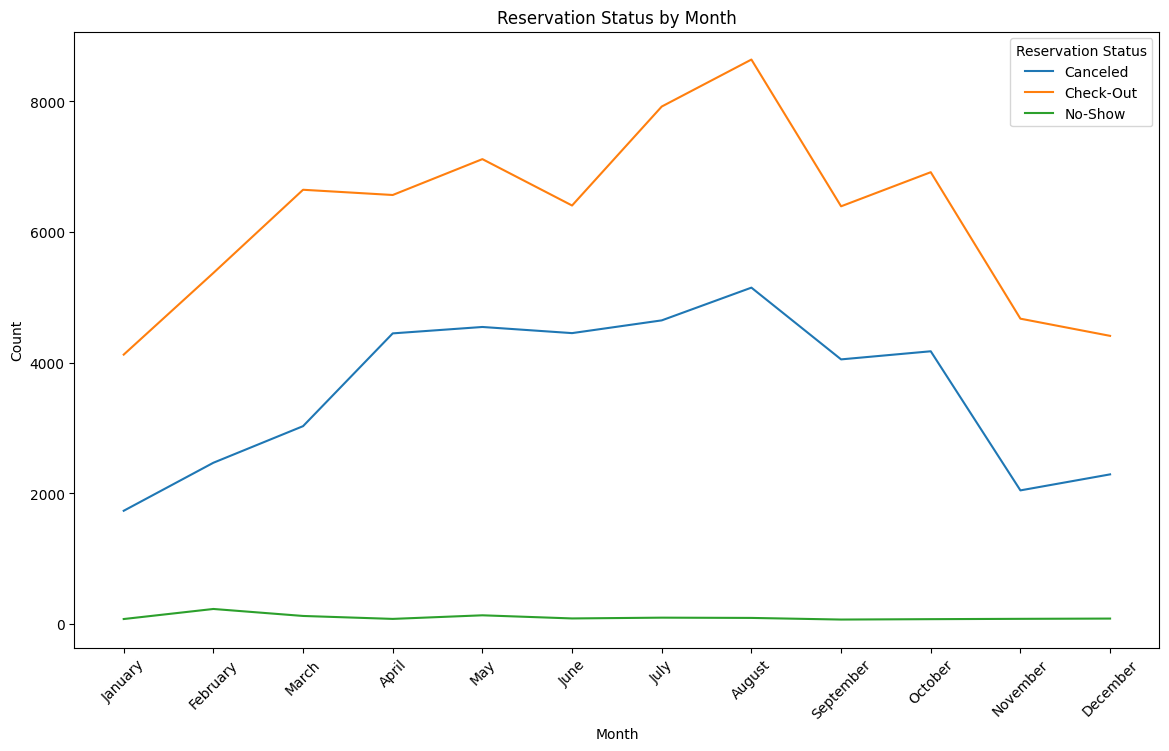

In [26]:
# Chart - 10 visualization code
# Setting the size of the plot
plt.figure(figsize=(14, 8))

# Aggregating data to get the count of each reservation status per month
reservation_status_data = hotel_booking_data.groupby(['arrival_date_month', 'reservation_status']).size().reset_index(name='count')

# Sorting months in chronological order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
reservation_status_data['arrival_date_month'] = pd.Categorical(reservation_status_data['arrival_date_month'], categories=months_order, ordered=True)
reservation_status_data = reservation_status_data.sort_values('arrival_date_month')

# Plotting the data
sns.lineplot(data=reservation_status_data, x='arrival_date_month', y='count', hue='reservation_status')

plt.title('Reservation Status by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I picked line chart because it shows trend of reservation status by month

##### 2. What is/are the insight(s) found from the chart?

after ploting line chart I found that most of cancellation and check out happen in the month of august and least in January month

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

hotels need to find out reason behind cancellation and try to minimize it

#### Chart - 11

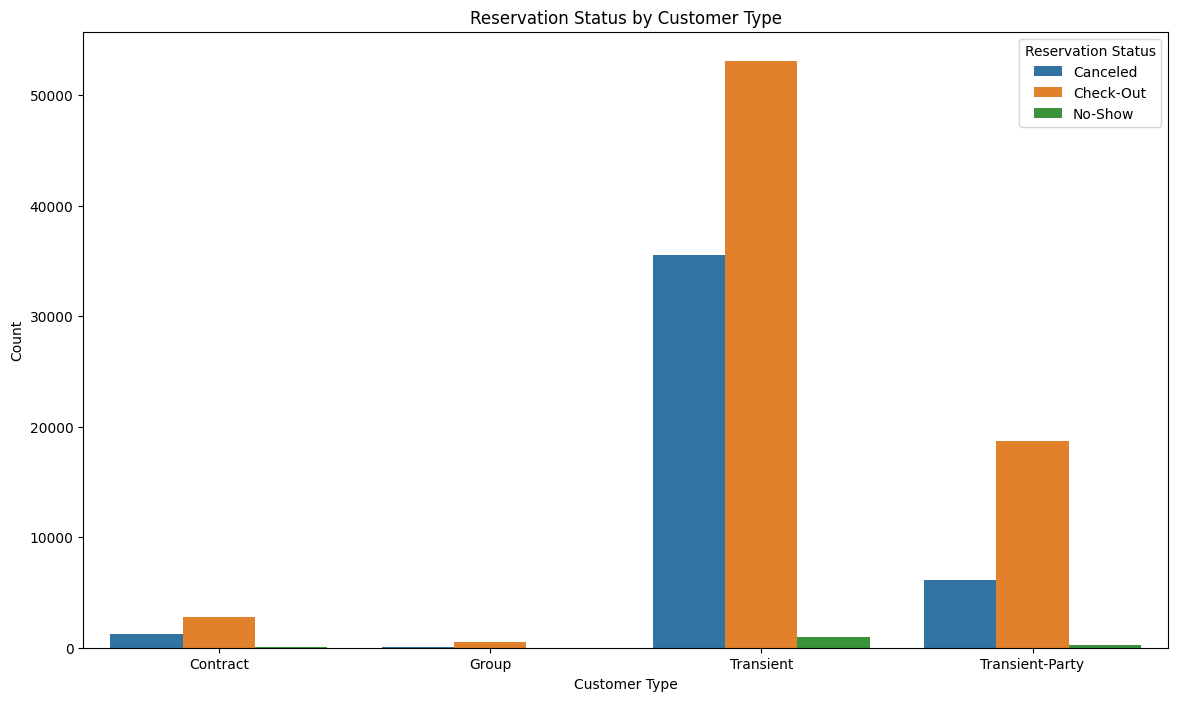

In [27]:
# Chart - 11 visualization code
# Setting the size of the plot
plt.figure(figsize=(14, 8))

# Aggregating data to get the count of each reservation status per customer type
customer_reservation_data = hotel_booking_data.groupby(['customer_type', 'reservation_status']).size().reset_index(name='count')

# Plotting the data
sns.barplot(data=customer_reservation_data, x='customer_type', y='count', hue='reservation_status')

plt.title('Reservation Status by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Reservation Status')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I picked bar graph to find customer type and their reservation status

##### 2. What is/are the insight(s) found from the chart?

Transient customer has highest number of cancellations and checkout group customer has least number of check-out and cancellation



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

hotel should try to minimize cancellation from transient customers

#### Chart - 12

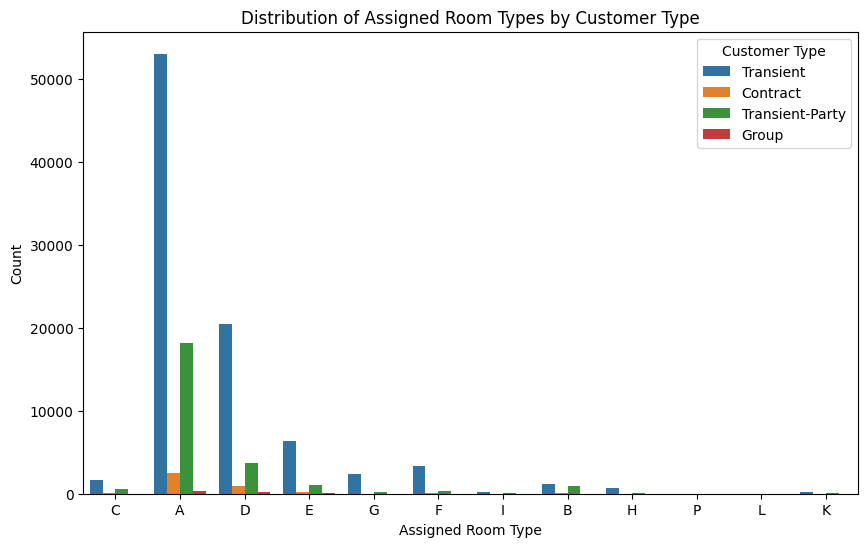

In [28]:
# Chart - 12 visualization code
# Plotting the relationship between customer_type and assigned_room_type
plt.figure(figsize=(10, 6))
sns.countplot(data=hotel_booking_data, x='assigned_room_type', hue='customer_type')
plt.title('Distribution of Assigned Room Types by Customer Type')
plt.xlabel('Assigned Room Type')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()


##### 1. Why did you pick the specific chart?

I picked bar chart to compare assigned room type by customer type which is categorical data

##### 2. What is/are the insight(s) found from the chart?

Transient customer are assigned highest in all room type room A is highest assigned compare to any other room type

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

other than A and D other rooom type are not assigned that much hotels need to find reason behind this

#### Chart - 13

/tmp/ipython-input-3815513354.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  special_requests_data = hotel_booking_data.groupby(['arrival_date_month', 'hotel'])['total_of_special_requests'].sum().reset_index()


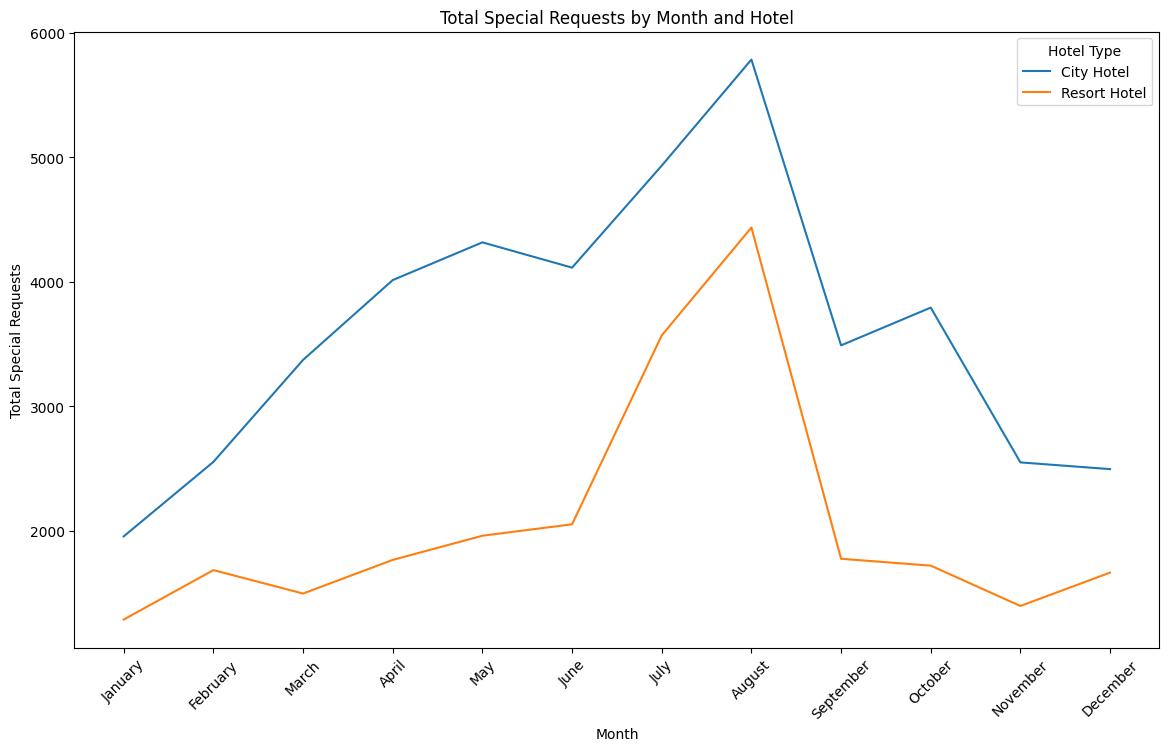

In [29]:
# Chart - 13 visualization code
# Setting the size of the plot
plt.figure(figsize=(14, 8))

# Aggregating data to get the sum of special requests per month for each hotel
special_requests_data = hotel_booking_data.groupby(['arrival_date_month', 'hotel'])['total_of_special_requests'].sum().reset_index()

# Sorting months in chronological order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
special_requests_data['arrival_date_month'] = pd.Categorical(special_requests_data['arrival_date_month'], categories=months_order, ordered=True)
special_requests_data = special_requests_data.sort_values('arrival_date_month')

# Plotting the data
sns.lineplot(data=special_requests_data, x='arrival_date_month', y='total_of_special_requests', hue='hotel')

plt.title('Total Special Requests by Month and Hotel')
plt.xlabel('Month')
plt.ylabel('Total Special Requests')
plt.legend(title='Hotel Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I picked line chart to show trend of total special request by hotel and month

##### 2. What is/are the insight(s) found from the chart?

after ploting chart I found that city hotel has more special requests than resort hotel also special reuest are least in january and highest in august

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

there is no negative impact on business

#### Chart - 14 - Pair Plot

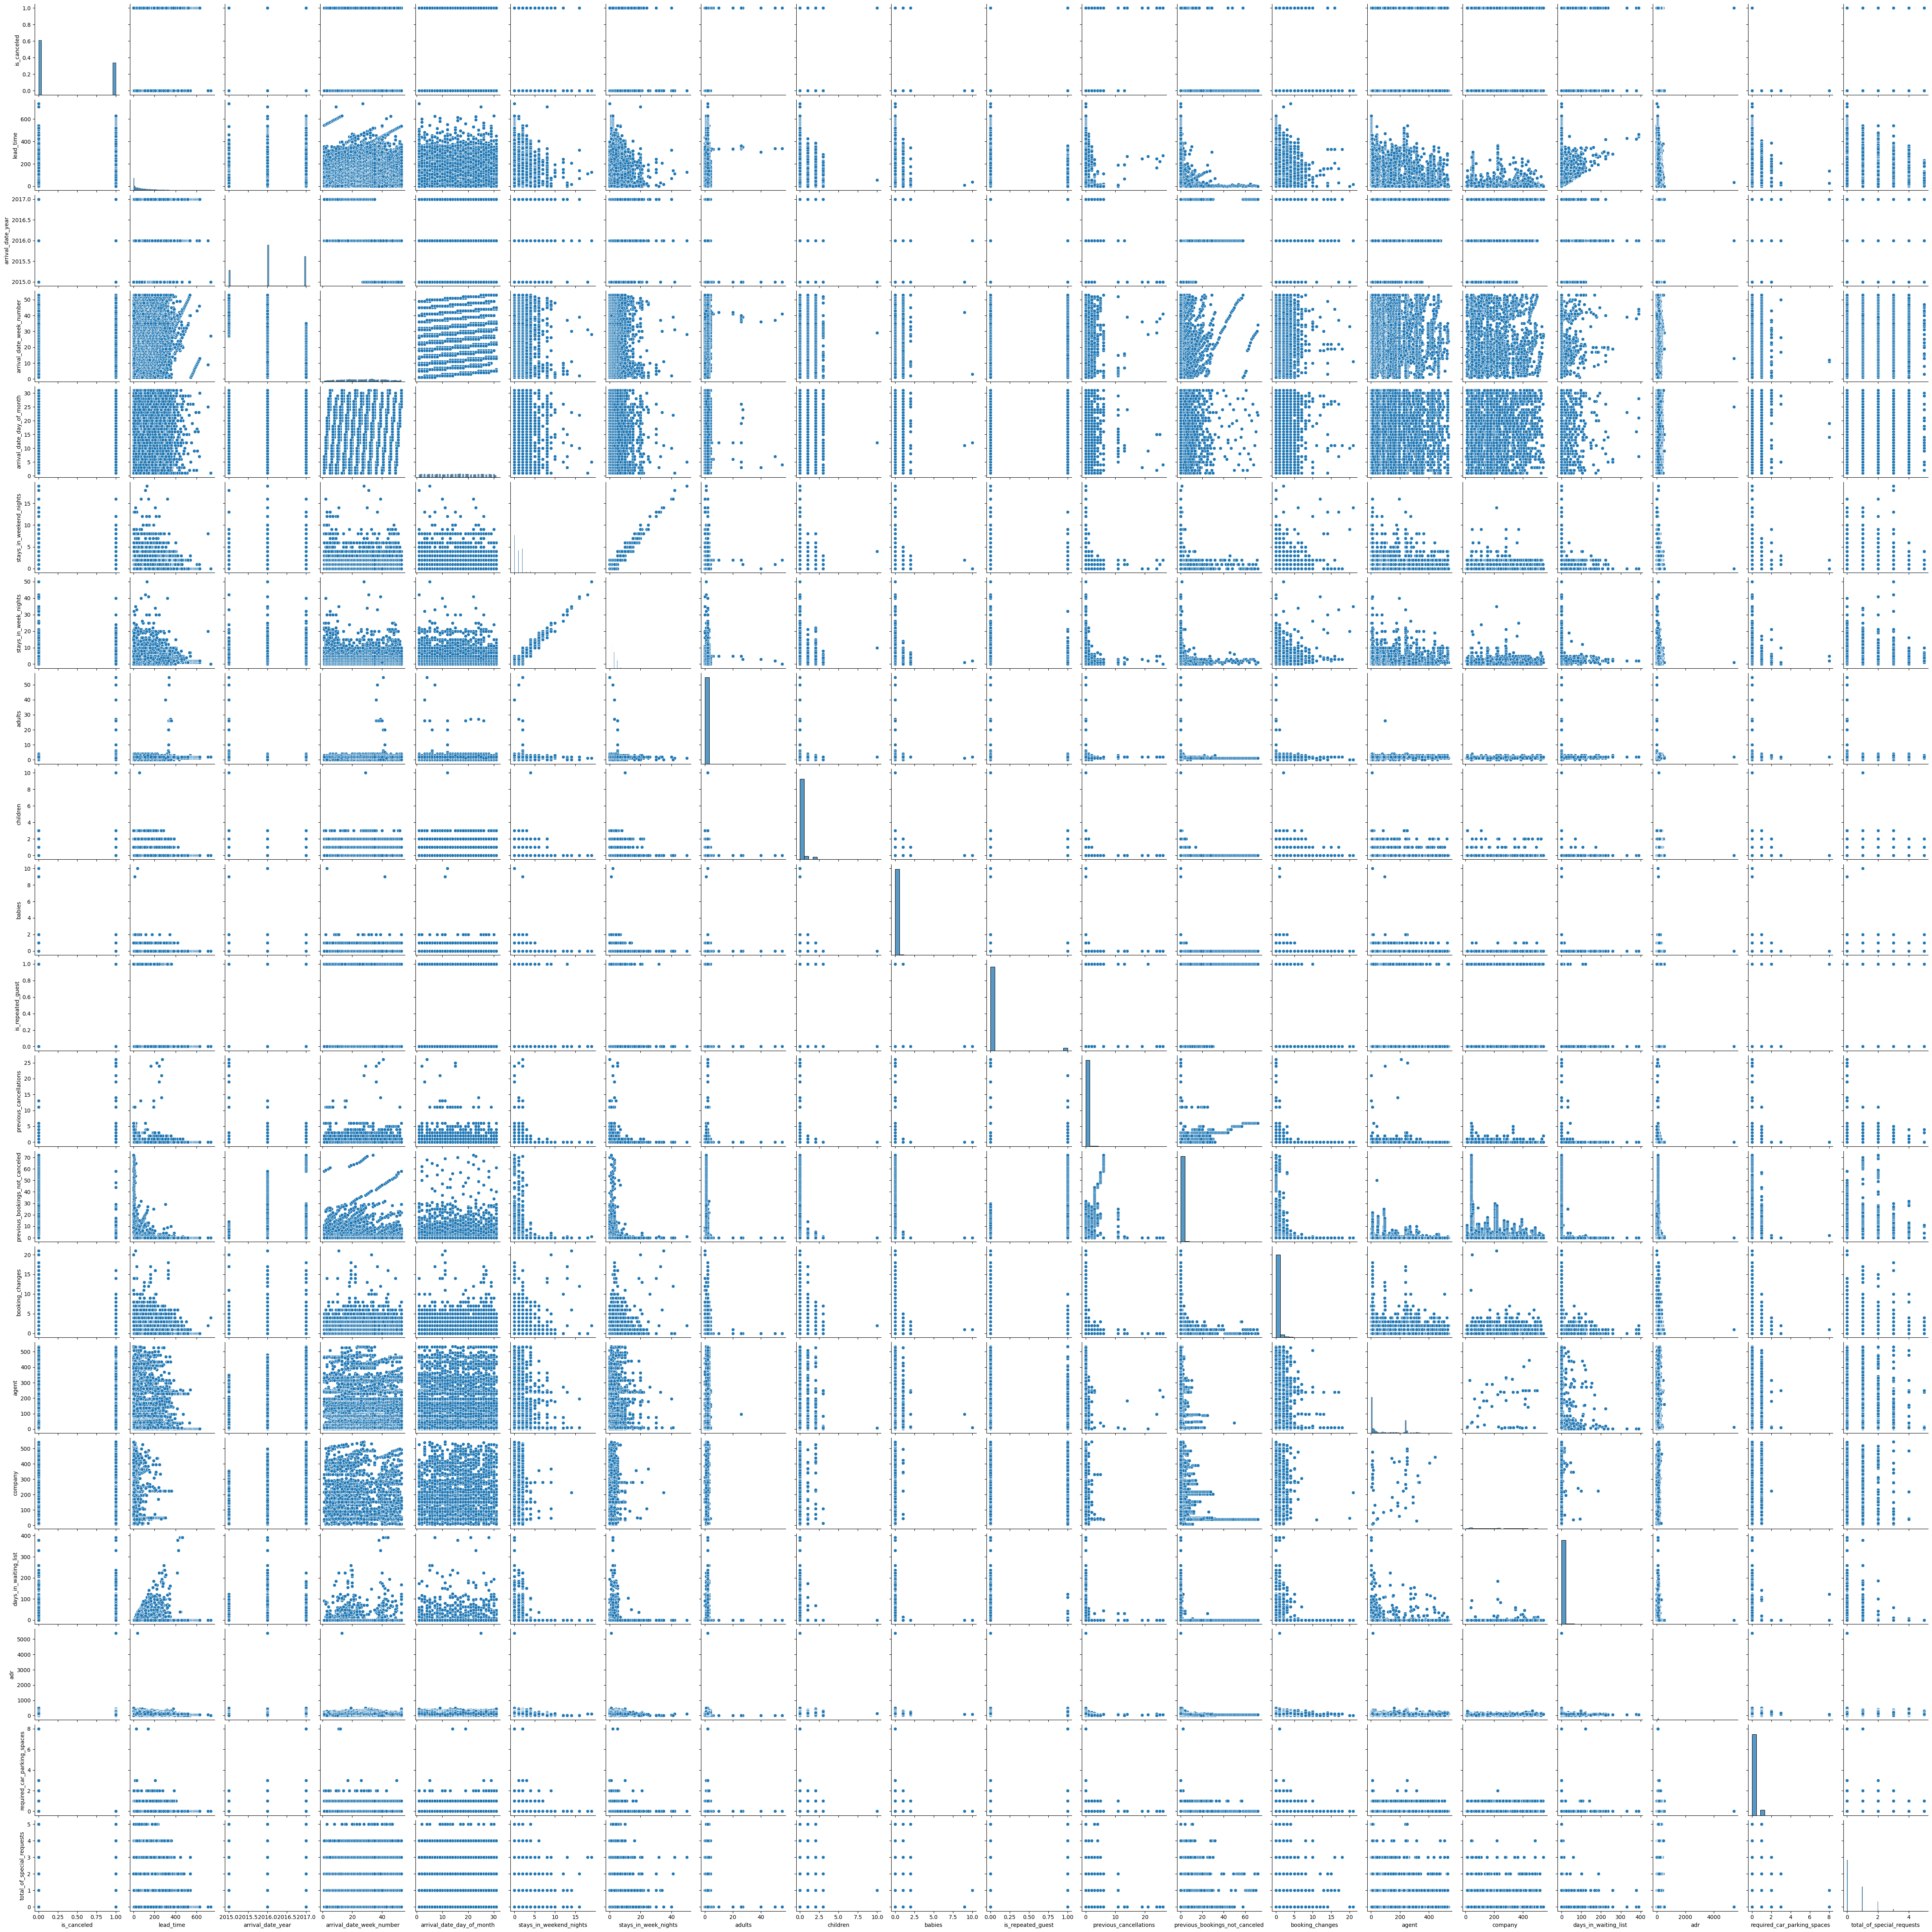

In [30]:
# Pair Plot visualization code
# Create a pairplot
sns.pairplot(hotel_booking_data)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is used to visualize relationships between pairs of variables in a dataset, showing scatter plots for each pair and distributions for individual variables. It helps identify correlations, patterns, clusters, and outliers, providing a comprehensive overview of data interactions.

##### 2. What is/are the insight(s) found from the chart?

there is linear relationship between stay_in_week_nights and stay_in_weekend_nights

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the insights:

To optimize hotel occupancy and guest satisfaction:

Focus on seasonal promotions to maximize bookings during peak months like August, and incentivize bookings during low-demand periods such as January.

Enhance partnerships with Online Travel Agencies (OTAs) to maintain and increase bookings, leveraging their dominance in the booking channels.

Adjust meal offerings based on preferences (e.g., promote Bed & Breakfast heavily, tailor Full Board and Half Board offerings to city and resort hotels respectively).

Implement dynamic parking management strategies to meet peak demand days identified from data analysis.

Prioritize training and operational adjustments to better accommodate special requests, especially in city hotels where demand is higher.

Enhance loyalty programs to encourage repeat bookings and reduce cancellations, particularly during peak cancellation months like August.

Streamline room allocation processes to optimize room availability and match customer preferences, such as the popularity of Room A.

These strategies aim to optimize operations, enhance guest experiences, and improve overall hotel performance based on data-driven insights.

# **Conclusion**

This project analyzed hotel booking data to uncover guest behavior and booking trends. We identified seasonal peaks, guest preferences (weeknights, BB meals, parking), booking lead times, and cancellation patterns. Understanding these factors allows hotels to optimize revenue management, target marketing efforts, and improve the guest experience through strategies like dynamic pricing and personalized service.